In [1]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt
import joblib 
import numpy as np 

from uncertainties import ufloat, unumpy

import mplhep as hep
hep.style.use("ATLAS")

In [4]:
best_model = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/LightGBM/4vars/full_dataset/lightgbm_gbdt.pkl')


In [5]:
print(best_model)

LGBMClassifier(bagging_fraction=0.9367626980204136, bagging_freq=2,
               feature_fraction=0.9078062096018138,
               lambda_l1=1.2253716283973005e-07,
               lambda_l2=1.8406905294877443e-06, min_child_samples=96,
               num_leaves=230)


In [111]:
pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/note_plots'
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'

reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5, 0.6, 0.7, 0.8]
label_ptrange = [500, 600, 800, 1000, 1200, 1500]


In [101]:
sampleA = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/pythiaA_pred.pkl')
sampleD = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/pythiaD_pred.pkl')
sampleE1 = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/pythiaE_part1_pred.pkl')
sampleE2 = joblib.load('/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao/nominal/pythiaE_part2_pred.pkl')

sample=sampleA
sample.update(sampleD)
sample.update(sampleE1)
sample.update(sampleE2)

In [102]:
sample.head()

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,...,is_leading,pt_idx,target,GBDT_newScore,jet_nTracks_quark_reweighting_weights,jet_nTracks_gluon_reweighting_weights,jet_trackBDT_quark_reweighting_weights,jet_trackBDT_gluon_reweighting_weights,GBDT_newScore_quark_reweighting_weights,GBDT_newScore_gluon_reweighting_weights
0,364703.0,46193254.0,766.747925,1.298662,2.0,0.318292,0.215923,-0.192873,21.0,17.609434,...,1.0,1,1,-1.426786,17.609434,17.609434,17.609434,17.609434,17.609434,17.609434
1,364703.0,46193254.0,701.621765,-0.989431,2.0,0.269898,0.157799,-0.126821,-1.0,17.609434,...,0.0,1,-,-2.029368,13.349345,9.555401,18.727486,18.075182,16.430940,15.729694
0,364704.0,46029800.0,567.369995,1.253171,34.0,0.157933,0.323757,0.253368,21.0,0.305107,...,1.0,0,1,1.562195,0.305107,0.305107,0.305107,0.305107,0.305107,0.305107
1,364704.0,46029800.0,517.005432,-0.372214,40.0,0.130906,0.308239,0.353442,21.0,0.305107,...,0.0,0,1,2.224734,0.378179,0.348352,0.348035,0.314166,0.416216,0.346941
2,364704.0,46032096.0,690.617371,-0.081755,14.0,0.023161,0.134914,-0.209946,3.0,0.449083,...,1.0,1,0,-1.793333,0.448903,0.401143,0.446572,0.433194,0.432625,0.402576


# Confusion matrix 

                jet_nTracks  jet_trackWidth  jet_trackC1  GBDT_newScore
jet_nTracks        1.000000        0.587741     0.685068       0.816319
jet_trackWidth     0.587741        1.000000     0.761575       0.499209
jet_trackC1        0.685068        0.761575     1.000000       0.771141
GBDT_newScore      0.816319        0.499209     0.771141       1.000000


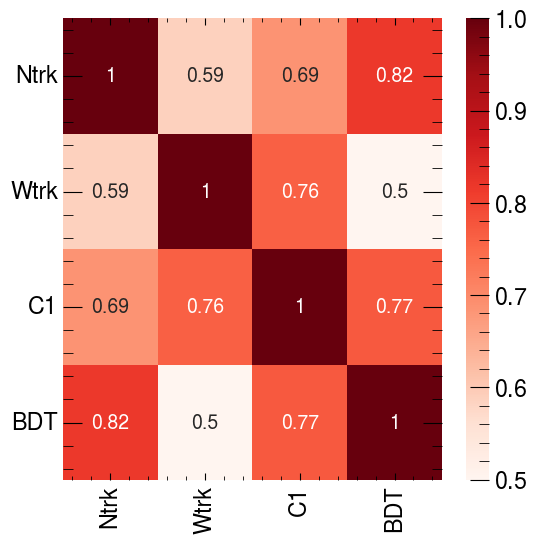

In [110]:
import seaborn as sns
#Using Pearson Correlation
training_vars = ['jet_nTracks', 'jet_trackWidth','jet_trackC1','GBDT_newScore']
vars=['Ntrk','Wtrk','C1','BDT']

plt.figure(figsize=(6,6))
cor = sample[training_vars].corr()
print(cor)
s=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
s.set(xticklabels=vars,yticklabels=vars)
#plt.savefig("./corr.pdf")
plt.show()

In [16]:
pkl = '/global/cfs/projectdirs/atlas/wys/gammajetntupleprod/run/Local_10000/data-minitrees/mc16_13TeV.364705.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ5WithSW.deriv.DAOD_JETM1.e7142_e5984_s3126_r9364_r9315_p4870.root'
pkl_path = Path(pkl)

#import uproot
#sample_root = uproot.open(pkl_path)['nominal']

In [14]:
from root_pandas import read_root

Welcome to JupyROOT 6.22/08


In [24]:
#sample_root.keys()
sample = read_root(pkl,'nominal',flatten=['jet_nTracks', 'jet_trackWidth','jet_trackC1','jet_cleaning'])
sample.head()

/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/root_numpy/_tree.py:234: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = _librootnumpy.root2array_fromfile(
/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/root_numpy/_tree.py:234: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = _librootnumpy.root2array_fromfile(
/global/cfs/projectdirs/atlas/wys/miniconda3/envs/ml/lib/python3.9/site-packages/root_numpy/

,run,event,last,year,mconly_weight,syst_weight,pu_weight,jet_fire,weight_pileup_up,weight_pileup_down,jet_nTracks,jet_trackWidth,jet_trackC1,jet_cleaning,__array_index
0,364705,34758458,17,2016,2.692492e-08,1.754055e-08,1.754055e-08,True,1.0,1.0,12.0,0.021106,0.172682,2,0
1,364705,34758458,17,2016,2.692492e-08,1.754055e-08,1.754055e-08,True,1.0,1.0,19.0,0.038895,0.199785,2,1
2,364705,34760082,17,2016,1.238429e-08,1.249249e-08,1.249249e-08,True,1.0,1.0,12.0,0.015742,0.176987,2,0
3,364705,34760082,17,2016,1.238429e-08,1.249249e-08,1.249249e-08,True,1.0,1.0,18.0,0.034008,0.168088,2,1
4,364705,34761735,17,2016,7.733862e-09,7.620025e-09,7.620025e-09,True,1.0,1.0,10.0,0.023214,0.097633,2,0


In [1]:
import seaborn as sns
#Using Pearson Correlation
training_vars = ['jet_nTracks', 'jet_trackWidth','jet_trackC1','jet_cleaning']
#vars=['Ntrk','Wtrk','C1','BDT']

plt.figure(figsize=(6,6))
cor = sample[training_vars].corr()
print(cor)
s=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#s.set(xticklabels=vars,yticklabels=vars)
plt.savefig("./jet_cleaning_corr.pdf")
plt.show()

NameError: name 'plt' is not defined

In [38]:
from WeightedCorr import WeightedCorr

In [40]:
weight_corr = WeightedCorr(df=sample[training_vars + ['event_weight']], wcol='event_weight')(method='pearson')

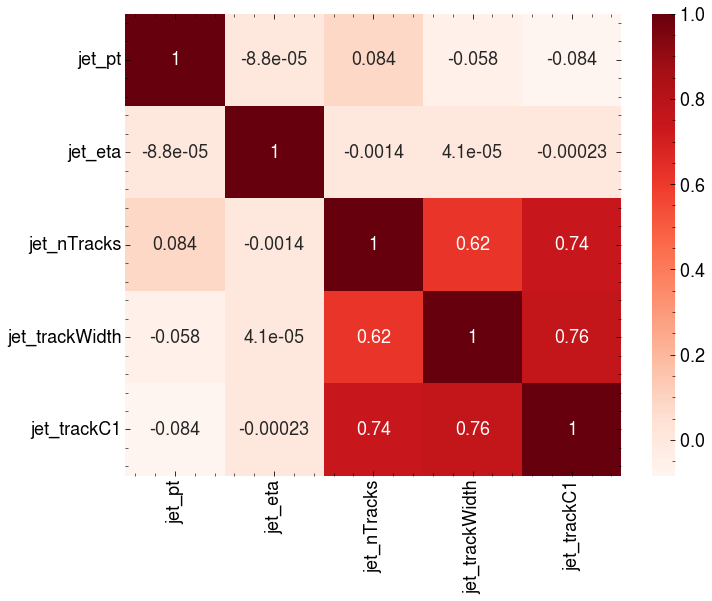

In [42]:
plt.figure()
sns.heatmap(weight_corr, annot=True, cmap=plt.cm.Reds)
plt.savefig("./plots/weighted_corr")
plt.show()